## Arrhenius plot and diffusion kinetic parameters for step-heating experiments

This notebook uses the reduced JSON data file of each step-heating experiments from the HAL to create their Arrhenius plots and calculate the diffusion kinetic parameters.

In [32]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#defining some constants
gas_constant = 8.314472   # universal gas constant in kJ/K*mol
avogadro = 6.022e+23   # in 1/mol
zirc_rho = 4.395  # GZ5 density in g/cm^3 from Ende et al. (2021)

### 1. Input sample specific values

In the cell below, input all necessary information for the specific sample.

In [34]:
Sample_ID = 'RS23_GZ5'

#slab dimensions in microns
width = 93
length_1 = 528
length_2 = 580

#alpha dose
alpha = 3.97e18 # /gram

half_width = (width/2) / 1e4 # in cm

In [35]:
#calculating volume 

vol = (width * length_1 * length_2) / 1e12  # in cm^3

#calculating volumetric mol of He

He_mol_total = ((vol * zirc_rho) * alpha) / avogadro   # in mol
#vol_He = (1e15 * (vol * zirc_rho) * alpha) / avogadro  # in fmol

#vol_He_sci = "{:e}".format(vol_He)
#print(vol_He_sci)

print(He_mol_total, ' mol')

8.251891321952839e-10  mol


### 2. Import JSON file
Use the script below to read a JSON from a local file. Simply input the name of the JSON file as `filename.json`. IMPORTANT: the file needs to be in the same directory as this notebook.

In [36]:
He_data = pd.read_json('RS23_GZ5_diff_cell_He_data.json', orient='index')

# adding column name to the respective columns
He_data.reset_index(inplace=True)  # assigning simple index for ease of calculation
He_data.columns =['sample_ID' , 'ncc_4He' , 'ncc_4He_1sig' , 'mol_He' , 'mol_He_1sig' , 'notes' , 'temp_degC', 'time_s']

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s
0,RS23_GZ5_150_1,20.207936,0.051128,9.015765e-13,2.281068e-15,None,150,3600
1,RS23_GZ5_175_1,24.695299,0.062088,1.101780e-12,2.770034e-15,None,175,3600
2,RS23_GZ5_200_1,57.294420,0.142545,2.556189e-12,6.359651e-15,None,200,3600
3,RS23_GZ5_225_1,102.001992,0.253470,4.550816e-12,1.130857e-14,None,225,3600
4,RS23_GZ5_250_1,169.459215,0.421090,7.560418e-12,1.878691e-14,None,250,3600
5,RS23_GZ5_275_1,3102.410676,24.116437,1.384140e-10,1.075954e-12,,275,3600
6,RS23_GZ5_300_1,2484.695101,19.314656,1.108546e-10,8.617229e-13,,300,1800


#### Appending temperature, time, and cumulative time

The easiest way would be to compile the heating temperature and time in an excel file (with column labels) and appending it to the data frame.

If temp and time were input in `He_line_calc_diff_cell.ipynb` script, then now just need to calculate `t_cum`.

In [37]:
#adding new columns from excel
#temp_time = pd.read_excel('G168_heating_tT.xlsx')

#He_data['temp_degC'] = temp_time ['temp_degC'].values
#He_data['time_s'] = temp_time ['time_s'].values

#adding new column for cumulative time in s
He_data['t_cum'] = He_data['time_s'].cumsum()

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_cum
0,RS23_GZ5_150_1,20.207936,0.051128,9.015765e-13,2.281068e-15,None,150,3600,3600
1,RS23_GZ5_175_1,24.695299,0.062088,1.101780e-12,2.770034e-15,None,175,3600,7200
2,RS23_GZ5_200_1,57.294420,0.142545,2.556189e-12,6.359651e-15,None,200,3600,10800
3,RS23_GZ5_225_1,102.001992,0.253470,4.550816e-12,1.130857e-14,None,225,3600,14400
4,RS23_GZ5_250_1,169.459215,0.421090,7.560418e-12,1.878691e-14,None,250,3600,18000
5,RS23_GZ5_275_1,3102.410676,24.116437,1.384140e-10,1.075954e-12,,275,3600,21600
6,RS23_GZ5_300_1,2484.695101,19.314656,1.108546e-10,8.617229e-13,,300,1800,23400


### 3. Making an Arrhenius plot
#### Calculating the fraction released `frac`, cumulative fraction released `f_cum`, and ln(D/${a^2}$) `ln_D_a2` for all the heating steps.

In [38]:
#empty lists that we'll append to
frac = []
ln_D_a2 = []

#calculating just the fraction released at individual steps

for i in range(len(He_data)):
    frac = He_data.mol_He / He_mol_total

He_data['frac'] = frac

#calculating cumulative fraction released and putting it into a new column
He_data['f_cum'] = He_data['frac'].cumsum()

#now calculating ln(D/a^2)
for i in range(len(He_data)):

    if i == 0:
        ln_Da2 = np.log((He_data.f_cum[i] ** 2) * (np.pi / (4 * He_data.time_s[i])))
    
    else:
        ln_Da2 = np.log((np.pi * (He_data.f_cum[i]**2 - He_data.f_cum[i-1]**2)) / (4 * He_data.time_s[i]))
        
    ln_D_a2.append(ln_Da2) 

#adding list into dataframe
He_data['ln_D_a2'] = ln_D_a2

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_cum,frac,f_cum,ln_D_a2
0,RS23_GZ5_150_1,20.207936,0.051128,9.015765e-13,2.281068e-15,None,150,3600,3600,0.001093,0.001093,-22.068700
1,RS23_GZ5_175_1,24.695299,0.062088,1.101780e-12,2.770034e-15,None,175,3600,7200,0.001335,0.002428,-20.698141
2,RS23_GZ5_200_1,57.294420,0.142545,2.556189e-12,6.359651e-15,None,200,3600,10800,0.003098,0.005525,-19.041528
3,RS23_GZ5_225_1,102.001992,0.253470,4.550816e-12,1.130857e-14,None,225,3600,14400,0.005515,0.011040,-17.730975
4,RS23_GZ5_250_1,169.459215,0.421090,7.560418e-12,1.878691e-14,None,250,3600,18000,0.009162,0.020202,-16.588909
5,RS23_GZ5_275_1,3102.410676,24.116437,1.384140e-10,1.075954e-12,,275,3600,21600,0.167736,0.187938,-11.785158
6,RS23_GZ5_300_1,2484.695101,19.314656,1.108546e-10,8.617229e-13,,300,1800,23400,0.134338,0.322277,-10.417422


#### Calculating uncertainties for `D_a2`.

We will use equations 20 and 24 of Ginster (2018, dissertation) to calculate the uncertainty for `D_a2`.

In [39]:
#empty lists that we'll append to
ln_D_a2_sig = []

#now calculating 1-sigma uncertainty for ln(D/a^2)
for i in range(len(He_data)):

    if i == 0:
        long_eq = ((1 - He_data.f_cum[i]) * He_data.mol_He_1sig[i])**2 + (He_data.f_cum[i]**2) \
                    * np.sum(np.square(He_data.mol_He_1sig[0:]))
        Da2_sig = ((np.pi/(2 * He_data.time_s[i])) * (He_data.f_cum[i]/He_mol_total) * np.sqrt(long_eq))
        ln_Da2_sig = np.log(np.exp(He_data.ln_D_a2[i]) + Da2_sig) - He_data.ln_D_a2[i]
    
    else:
        long_eq1 = ((He_data.f_cum[i] * (1 - He_data.f_cum[i]) - He_data.f_cum[i-1] * (1 - He_data.f_cum[i-1]))**2) \
                    * np.sum(He_data.mol_He_1sig[:i]**2)
        long_eq2 = ((He_data.f_cum[i] * (1 - He_data.f_cum[i]) + He_data.f_cum[i-1]**2)**2) \
                    * He_data.mol_He_1sig[i]**2
        long_eq3 = ((He_data.f_cum[i-1]**2 - He_data.f_cum[i]**2)**2) \
                    * np.sum(np.square(He_data.mol_He_1sig[i+1:]))
        Da2_sig2 = ((np.pi/(2 * He_data.time_s[i] * He_mol_total)) * np.sqrt(long_eq1 + long_eq2 + long_eq3))
        ln_Da2_sig = np.log(np.exp(He_data.ln_D_a2[i]) + Da2_sig2) - He_data.ln_D_a2[i]
        
    ln_D_a2_sig.append(ln_Da2_sig) 

#adding list into dataframe
He_data['ln_D_a2_sig'] = ln_D_a2_sig

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,temp_degC,time_s,t_cum,frac,f_cum,ln_D_a2,ln_D_a2_sig
0,RS23_GZ5_150_1,20.207936,0.051128,9.015765e-13,2.281068e-15,None,150,3600,3600,0.001093,0.001093,-22.068700,0.006041
1,RS23_GZ5_175_1,24.695299,0.062088,1.101780e-12,2.770034e-15,None,175,3600,7200,0.001335,0.002428,-20.698141,0.005046
2,RS23_GZ5_200_1,57.294420,0.142545,2.556189e-12,6.359651e-15,None,200,3600,10800,0.003098,0.005525,-19.041528,0.004906
3,RS23_GZ5_225_1,102.001992,0.253470,4.550816e-12,1.130857e-14,None,225,3600,14400,0.005515,0.011040,-17.730975,0.004790
4,RS23_GZ5_250_1,169.459215,0.421090,7.560418e-12,1.878691e-14,None,250,3600,18000,0.009162,0.020202,-16.588909,0.004703
5,RS23_GZ5_275_1,3102.410676,24.116437,1.384140e-10,1.075954e-12,,275,3600,21600,0.167736,0.187938,-11.785158,0.011554
6,RS23_GZ5_300_1,2484.695101,19.314656,1.108546e-10,8.617229e-13,,300,1800,23400,0.134338,0.322277,-10.417422,0.008094


#### Now plotting `ln_D_a2` vs 1e4/T(K)
Temperature is listed as degree C, so we'd need to convert that and divide it by 1e4. In order to be able to easily calculate linear regression and visualize linear vs non-linear trends, we will plot these separately. Therefore, the index number for the last NAB step should be changed for each experiment.

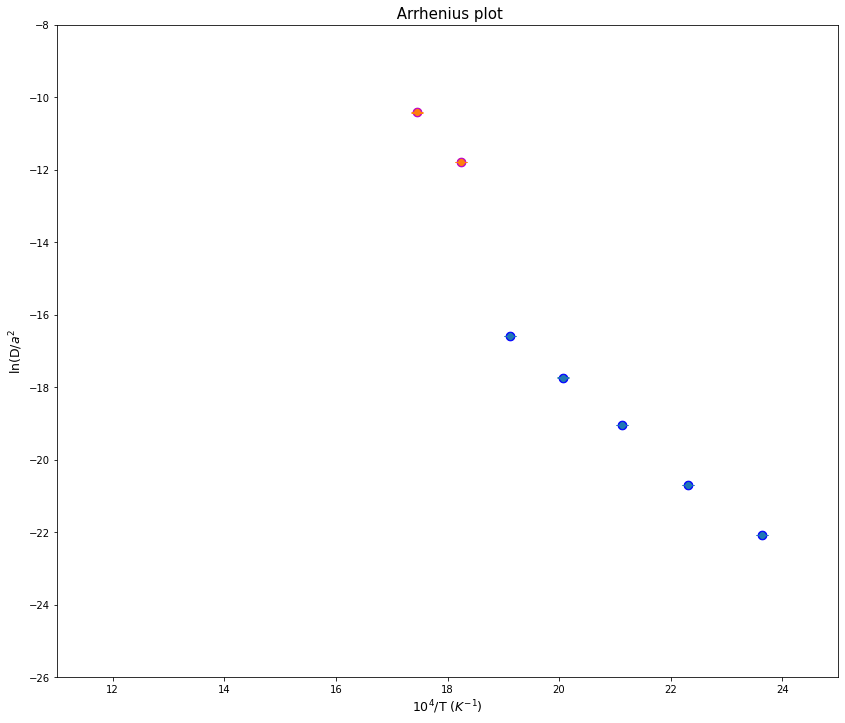

In [40]:
plt.figure(figsize = (14, 12))
plt.xlabel(r'$10^{4}$/T ($K^{-1}$)', fontsize='12.5')
plt.ylabel(r'ln(D/$a^{2}$', fontsize='12.5')
plt.xlim(11, 25)
plt.ylim(-26, -8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title(' Arrhenius plot', fontsize='15')

# FIRST OF ALL input the index for the FIRST Arrhenius datapoint that will be used for regression

arr_1 = 5


# now we will make the Arrhenius plot

x_axis1 = 1e4 / (He_data.temp_degC.iloc[:arr_1] + 273.15)
x_axis2 = 1e4 / (He_data.temp_degC.iloc[arr_1:] + 273.15)

ln_D_a2_arr = He_data.ln_D_a2.iloc[arr_1:]

plt.scatter(x_axis1, He_data.ln_D_a2.iloc[:arr_1], color = 'b', s=75)
plt.scatter(x_axis2, He_data.ln_D_a2.iloc[arr_1:], color = 'm', s=75)

plt.errorbar(x_axis1, He_data.ln_D_a2.iloc[:arr_1], yerr=He_data.ln_D_a2_sig.iloc[:arr_1], fmt='o', capsize=6)
plt.errorbar(x_axis2, He_data.ln_D_a2.iloc[arr_1:], yerr=He_data.ln_D_a2_sig.iloc[arr_1:], fmt='o', capsize=6)

#plt.savefig('.pdf') 
plt.show()

### 4. Calculating weighted and unweighted regression for Arrhennius plot
First we'll set up the linear regression equations

DON'T FORGET TO CHANGE THE n-value to the number of datapoints to regress!!!

In [10]:
#THIS IS FOR UNWEIGHTED LINEAR REGRESSION
#insert n-value here. will be used for the rest of the calc
n = 

def ord_lin_regress(X_vals, Y_vals):
    
    #hint: it helps to create arrays for XY values and X^2 (use x**2 to raise something to a power) from your input
    #first create some empty arrays
    
    XY_vals = []
    X2_vals = []
    
    #then try this for loop (remember that Python uses zero indexing):
    
    for i in range(len(X_vals)):
        XY = X_vals[i] * Y_vals[i]
        X2 = X_vals[i]**2
        
        XY_vals.append(XY)
        X2_vals.append(X2)
        
    #now calculate slope and intercept below using the sum function, I'll let you try the math here
    
    slope = (sum(XY_vals) - (sum(X_vals)*sum(Y_vals)/n)) / (sum(X2_vals) - ((sum(X_vals)**2)/n))
    intercept = (sum(X_vals) * sum(XY_vals) - sum(Y_vals) * sum(X2_vals)) / ((sum(X_vals)**2) - n*sum(X2_vals))
    
    return slope, intercept

Now we'll calculate the slope and intercept for the Arrhenius trend. To make things easier we'll make a new dataframe only with the data we want to calculate the linear regression with.

In [11]:
#THIS IS FOR UNWEIGHTED LINEAR REGRESSION

#making new lists. don't forget to change the range of datapoints
x_axis2 = 1e4 / (He_data.temp_degC.iloc[arr_1:] + 273.15)
ln_D_a2_arr = He_data.ln_D_a2.iloc[arr_1:]
ln_D_a2_sig_arr = He_data.ln_D_a2_sig.iloc[arr_1:]

arrhenius_data = {'temp': x_axis2, 'ln_D_a2_arr':ln_D_a2_arr, 'ln_D_a2_sig_arr':ln_D_a2_sig_arr}
#making new dataframe and resetting index
arr_data = pd.DataFrame(arrhenius_data)
arr_data.reset_index(inplace=True)

#now we'll do the calculation
arrhenius = ord_lin_regress(arr_data.temp, arr_data.ln_D_a2_arr)

slope_un = arrhenius[0]
intercept_un = arrhenius[1]

print('The unweighted slope is ', arrhenius[0])
print('The unweighted intercept is ', arrhenius[1])

The unweighted slope is  -1.4519598540039158
The unweighted intercept is  4.844819287525969


#### 4.5 Weighted linear regression with errors in y (`D_a2`)
Alternatively, we can calculate the slope and intercept using weighted linear regression, taking into account the errors in `ln_D_a2`.

In [12]:
#first calculate the weighing factor, w that will be used for 
w_i = []

for i in range(len(arr_data)):
    w = (n * arr_data.ln_D_a2_sig_arr[i]**(-2)) / np.sum(arr_data.ln_D_a2_sig_arr**(-2))
    w_i.append(w)

arr_data['w_i'] = w_i

w_sum = np.sum(arr_data.w_i)
w_sum  # check that this is equal to the number of datapoints to regress, n

39.99999999999999

In [13]:
wy_i = []
wx_i = []
wxy_i = []
w_x2_i = []  # w * x^2
    
#then try this for loop (remember that Python uses zero indexing):
    
for i in range(len(arr_data)):
    wy = arr_data.w_i[i] * arr_data.ln_D_a2_arr[i]
    wx = arr_data.w_i[i] * arr_data.temp[i]
    wxy = arr_data.w_i[i] * arr_data.temp[i] * arr_data.ln_D_a2_arr[i]
    w_x2 = arr_data.w_i[i] * arr_data.temp[i]**2
        
    wy_i.append(wy)
    wx_i.append(wx)
    wxy_i.append(wxy)
    w_x2_i.append(w_x2)
        
#now calculate slope and intercept below using the sum function, I'll let you try the math here
    
slope_wght = (n * sum(wxy_i) - sum(wx_i) * sum(wy_i)) / (n * sum(w_x2_i) - sum(wx_i)**2)
intercept_wght = (sum(wy_i) - slope_wght * sum(wx_i)) / n

print('The weighted slope is ', slope_wght)
print('The weighted intercept is ', intercept_wght)

The weighted slope is  -1.4460240793713466
The weighted intercept is  4.730957431753566


### 5. Calculting std dev and 95% confidence interval in `slope` and `intercept` of linear regressions.
We will use the equation in "Chemometrics using R: Chapter 8.1".

#### Uncertainty for unweighted regression
First, we will calculate the standard deviation about the regression, `s_r`.

In [14]:
y_min_y_2 =[]

#calculating std dev about the regression, s_r. uncomment the eq you want to use
for i in range(len(arr_data)):
    #reg_eq = slope_un * arr_data.temp[i] + intercept_un  # unweighted linear eq
    reg_eq = slope_wght * arr_data.temp[i] + intercept_wght  # weighted linear eq
    yi_min_yp_2 = (arr_data.ln_D_a2_arr[i] - reg_eq) ** 2
    
    y_min_y_2.append(yi_min_yp_2)
    
s_r = np.sqrt(np.sum(y_min_y_2) / (n - 2))  # same n as in section 4
print('Standard deviation about the regression =', s_r)

Standard deviation about the regression = 0.086004323474587


Now, we will calculate the standard deviations for the slope, `s_slope`, and y-intercept, `s_int`. IMPORTANT: Make sure to choose which equation to use for `reg_u` above!

In [15]:
#first to calculate the mean of x (temp)
mean_T = np.mean(arr_data.temp)

x2 = []
x_min_x2 = []

# now to calculate x_i - x_expected in a for loop
for i in range(len(arr_data)):
    
    x2_i = arr_data.temp[i] ** 2
    x_min_x2_i = (arr_data.temp[i] - mean_T) ** 2
    
    x2.append(x2_i)
    x_min_x2.append(x_min_x2_i)
    
#calculating std dev for slope and intercept
s_slope = np.sqrt((s_r ** 2) / np.sum(x_min_x2))
s_int = np.sqrt((s_r**2 * sum(x2)) / (n * sum(x_min_x2)))

print(s_slope, s_int)

0.00853249163142971 0.13021177251679616


To calculate the confidence interval, we need to select the t-test critical values `alpha_t` and degrees of freedom `df` (simply n-2). Make sure to use the two-tailed `alpha_t`. The t value can be found online (e.g., https://www.medcalc.org/manual/t-distribution-table.php)

In [16]:
#THIS IS FOR UNWEIGHTED LIN REG
# we want to calculate 95% confidence interval (alpha_T = 0.05) for n =  (df = )
t_test = 

CI95_slope = s_slope * t_test
CI95_int = s_int * t_test

print(CI95_slope, CI95_int)

0.017269763062013735 0.26354862757399544


### 6. Calculate diffusion kinetic parameters  `E_a` and `D_0` with uncertainties.
Now we can calculate the diffusion kinetic parameters: activation energy `E_a` and frequency factor `D_0`.
#### NOTE: only either the weighted or unweighted uncertainties can be reported at a time due to the way the code is set up in part 5.

In [23]:
#calculating activation energy and frequency factor with UNWEIGHTED lin reg

E_a = - gas_constant * slope_un * 10  # in kJ/mol
D_0 = np.exp(intercept_un) * half_width**2

#uncertainty calculation.

E_a_stdv = E_a - (- gas_constant * (slope_un+s_slope) * 10)
E_a_CI95 = E_a - (- gas_constant * (slope_un+CI95_slope) * 10)
D_0_stdev = np.exp(intercept_un+s_int) * half_width**2 - D_0
D_0_CI95 = np.exp(intercept_un+CI95_int) * half_width**2 - D_0

print(u'Unweighted E_a =', E_a, '\u00B1', E_a_stdv, 'kJ/mol (1\u03C3).')
print(u'Unweighted E_a =', E_a, '\u00B1', E_a_CI95, 'kJ/mol (95% CI).')
print(u'Unweighted D_0 =', D_0, '\u00B1', D_0_stdev, 'cm^2/s (1\u03C3).')
print(u'Unweighted D_0 =', D_0, '\u00B1', D_0_CI95, 'cm^2/s (95% CI).')
print('These are not the actual errors. Please see note for part 5 above.') #uncomment if necessary

Unweighted E_a = 120.72279551239646 ± 0.7094316275975814 kJ/mol (1σ).
Unweighted E_a = 120.72279551239646 ± 1.4358896142574764 kJ/mol (95% CI).
Unweighted D_0 = 0.002460274896860321 ± 0.00034214940007519816 cm^2/s (1σ).
Unweighted D_0 = 0.002460274896860321 ± 0.0007418727296030292 cm^2/s (95% CI).
These are not the actual errors. Please see note for part 5 above.


In [25]:
#calculating activation energy and frequency factor with WEIGHTED lin reg

Ea_w = - gas_constant * slope_wght * 10  # in kJ/mol
D0_w = np.exp(intercept_wght) * half_width**2

#uncertainty calculation.

Ea_w_stdv = Ea_w - (- gas_constant * (slope_wght+s_slope) * 10)
Ea_w_CI95 = Ea_w - (- gas_constant * (slope_wght+CI95_slope) * 10)
D0_w_stdev = np.exp(intercept_wght+s_int) * half_width**2 - D0_w
D0_w_CI95 = np.exp(intercept_wght+CI95_int) * half_width**2 - D0_w

print(u'Weighted E_a =', Ea_w, '\u00B1', Ea_w_stdv, 'kJ/mol (1\u03C3).')
print(u'Weighted E_a =', Ea_w, '\u00B1', Ea_w_CI95, 'kJ/mol (95% CI).')
print(u'Weighted D_0 =', D0_w, '\u00B1', D0_w_stdev, 'cm^2/s (1\u03C3).')
print(u'Weighted D_0 =', D0_w, '\u00B1', D0_w_CI95, 'cm^2/s (95% CI).')
#print('These are not the actual errors. Please see note for part 5 above.') #uncomment if necessary

Weighted E_a = 120.2292671925884 ± 0.7094316275975814 kJ/mol (1σ).
Weighted E_a = 120.2292671925884 ± 1.4358896142574764 kJ/mol (95% CI).
Weighted D_0 = 0.002195503125516519 ± 0.0003053277006635842 cm^2/s (1σ).
Weighted D_0 = 0.002195503125516519 ± 0.0006620332950019094 cm^2/s (95% CI).


### END (FOR NOW)
misc stuff below

Some random but useful lines of code:

In [19]:
#adding new empty columns
#He_data.insert(loc=4, column='temp_degC', value='')

#appending new values one by one OR to replace an existing one
#He_data.at['RS23_G168_200_1', 'temp_degC'] = 200
#He_data.at['RS23_G168_200_1', 'time_s'] = 3600

#if you need to delete a row/column for some reason
#He_data = He_data.drop(labels="time_s", axis=1)

Calculating fraction and ln(D/${a^2}$) for the first heating step (not needed anymore but just keeping it here)

In [20]:
#calculating first fraction, f_first and ln(D/a^2)

#f_first = He_data.mol_He[0] / He_mol_total
#ln_D_a2 = np.log((f_first**2) * (np.pi / (4 * He_data.time_s[0])))

#print(f_first, ln_D_a2)

#adding columns for frac, f_cum, and ln_D_a2
#He_data['frac'] = ''
#He_data['f_cum'] = ''
#He_data['ln_D_a2'] = ''

#appending to first row of dataframe

#He_data.at['RS23_G168_150_1', 'frac'] = f_first
#He_data.at['RS23_G168_150_1', 'ln_D_a2'] = ln_D_a2

#He_data